In [1]:
from pipeline.step_3.build_pipeline import load_and_preprocess

In [2]:
df = load_and_preprocess()

[Pipeline] ......... (step 1 of 6) Processing drop_data, total=   0.0s
[Pipeline] . (step 2 of 6) Processing drop_na_base_data, total=   0.0s
[Pipeline] . (step 3 of 6) Processing drop_fill_na_data, total=   0.1s
[Pipeline]  (step 4 of 6) Processing drop_non_informative_data, total=   0.1s


/Users/dev.daniil.bakushkin/Desktop/suppi/ml/app/pipeline/step_0/custom_transformers.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(mode_, inplace=True)
/Users/dev.daniil.bakushkin/Desktop/suppi/ml/app/pipeline/step_0/custom_transformers.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X.groupby([self.col_group_by_1, self.col_group_by_2])[
/Users/dev.daniil.bakushkin/Desktop/suppi/ml/app/pipeline/step_0/custom_transformers.py:173: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

[Pipeline]  (step 5 of 6) Processing join_non_informative_data, total=   0.0s
[Pipeline] . (step 6 of 6) Processing group_by_day_data, total=   5.3s
[Pipeline] ...... (step 1 of 2) Processing keep_feature, total=   0.0s


/Users/dev.daniil.bakushkin/miniconda3/envs/shad/lib/python3.11/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/dev.daniil.bakushkin/miniconda3/envs/shad/lib/python3.11/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/dev.daniil.bakushkin/miniconda3/envs/shad/lib/python3.11/site-packages/sklearn/utils/extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


[Pipeline] ............... (step 2 of 2) Processing knn, total=  41.1s


In [9]:
from pipeline.step_4.build_pipeline import visualization, set_datetime
df.head(1)
# visualization(df)

,num_actions,position_category,price_index,external_index_data_minimal_price,external_index_data_price_index_value,self_marketplaces_index_data_minimal_price,self_marketplaces_index_data_price_index_value,marketing_seller_price,marketing_price,conv_tocart,conv_tocart_pdp,hits_tocart,hits_tocart_pdp,hits_view_search,shop_id,offer_id,date,title,warehouse_name,delivery_schema,gross_profit,sales_profit,prime_cost_of_paid,prime_cost_of_return,cancellation_processing,seller_bonuses_cost,cross_docking_cost_prod,gds_net_profit_after_tax,gds_profitability_after_tax,other_cost_prod,placement_cost_prod,promotion_advertising_prod,promotion_reviews_prod,shop_net_profit_after_tax,shop_net_profit_bfr_tax,shop_profitability_after_tax,gds_net_profit_bfr_tax,sum_reverse_logistics_orders_commission_installment_sale_cost_last_mile_returns_commission_direct_logistics_acquiring_cost_prod,accruals,TARGET
0,0.0,-0.062177,-0.259311,-0.069317,-0.154751,1.420795,0.0,-0.085417,-0.439822,-0.08107,-0.297859,-0.18764,-0.079189,0.0,479580b8-30b1-4ace-9da1-77649e3c39ee,1RCA-1RCA-1.2M,2023-09-01,"Шнур TWIST аудио-видео: 1RCA-1RCA, тюльпаны- к...",ХОРУГВИНО,FBO,106.63,30.21,-34.37,0.0,0.0,-0.45,-1.631125,10.977445,8.1,-0.321904,-1.243787,-14.448265,-0.346393,30.21,30.21,21.74,10.977445,-77.211081,141.0,1


In [4]:
from pandas.tseries.offsets import DateOffset
from utils.reader import ReadData
import pandas as pd


def train_test_split(df):

    def set_datetime(df):
        df['date'] = pd.to_datetime(df['date'])
        df = df.set_index('date', drop=True, inplace=False)
        df.sort_index(inplace=True)
        return df

    def get_split(df: pd.DataFrame):
        offset = df.index[-1] - DateOffset(weeks=1)
        df_train = df[df.index < offset]
        df_test = df[df.index >= offset]
        df_train.reset_index(inplace=True)
        df_test.reset_index(inplace=True)
        return df_train, df_test

    df = set_datetime(df)
    df_train, df_test = get_split(df)

    return df_train, df_test


def set_target(df):
    TARGET = 'TARGET'
    qp, qr = 'quantity_of_paid', 'quantity_of_return',
    df[TARGET] = df[qp] - df[qr]
    df.drop([qp, qr], axis=1, inplace=True)
    return df


def load_and_preprocess(df):
    # data, feature, meta
    df = set_target(df)
    df_train, df_test = train_test_split(df)
    return df_train, df_test


df_data_train, df_data_test = load_and_preprocess(df)

In [7]:
import import_ipynb
from models import model_0 as model

model = model.Model()

In [45]:
shop_id = df_data_train.shop_id[0]
offer_id = df_data_train.groupby('offer_id')['TARGET'].sum().index[df_data_train.groupby('offer_id')['TARGET'].sum().argmax()]



In [ ]:
# create the model

model.main(inference=False, df=series)

importing Jupyter notebook from model.ipynb


100%|██████████| 12/12 [00:07<00:00,  1.53it/s]


<Figure size 960x720 with 0 Axes>

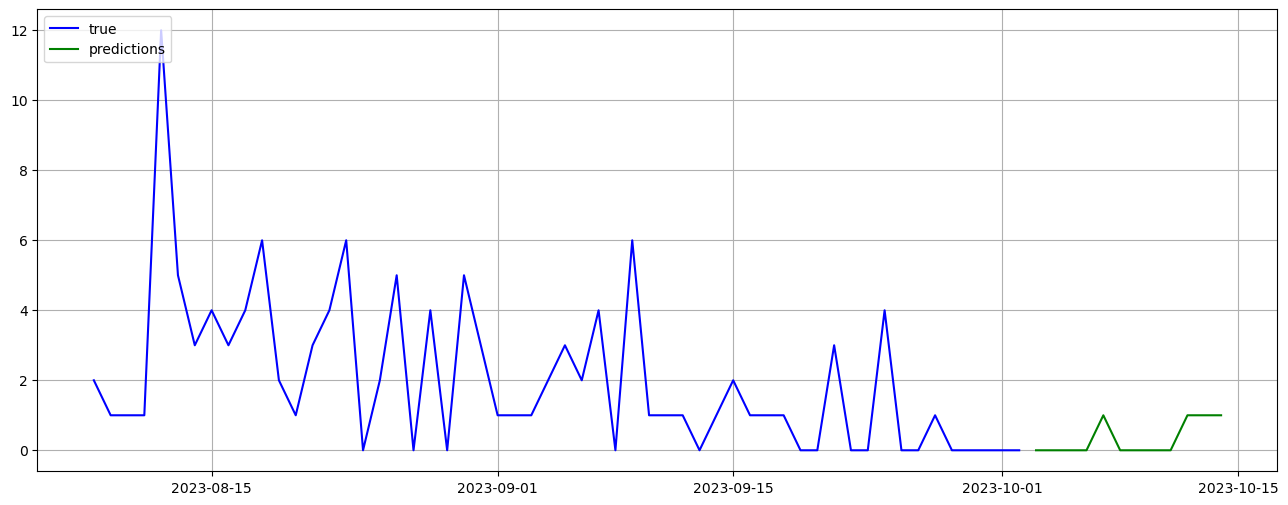

In [8]:
import model
import imp
imp.reload(model)
model = model.Model()

model.main(inference=True, df=series)